In [150]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model


model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 1s 5ms/step - loss: 1.2741 - sparse_categorical_accuracy: 0.6431
Epoch 2/3
100/100 [==============================] - 1s 5ms/step - loss: 0.3775 - sparse_categorical_accuracy: 0.8998
Epoch 3/3
100/100 [==============================] - 1s 5ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8938


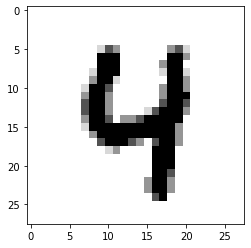

In [57]:
import matplotlib.pyplot as plt

plt.imshow(elem[0][0,:].numpy().reshape(28, 28), cmap="Greys")

In [ ]:
def print_bag():
    model.evaluate(x_test, y_test)

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
model.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback])

Epoch 1/3
  28/1563 [..............................] - ETA: 5s - loss: 0.1013 - sparse_categorical_accuracy: 0.9676 

2022-01-28 13:02:01.827083: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-28 13:02:01.827102: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-28 13:02:01.827121: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-28 13:02:01.966677: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-28 13:02:01.966698: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-28 13:02:01.968590: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-01-28 13:02:01.969229: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-28 13:02:01.969879: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/train/plugins/profile/2022_01_28_13_02_01
2022-01-28 13:02:01.970239: I tensorflow/core/profile

1563/1563 [==============================] - 7s 4ms/step - loss: 0.0845 - sparse_categorical_accuracy: 0.9755
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9786
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9814


In [88]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        plt.figure()
        self.loss_history = []

    def on_train_batch_end(self, batch, logs=None):
    #     print(
    #         "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
    #     )
        self.loss_history.append(logs["loss"])
        plt.plot(self.loss_history)

    def on_test_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
        )

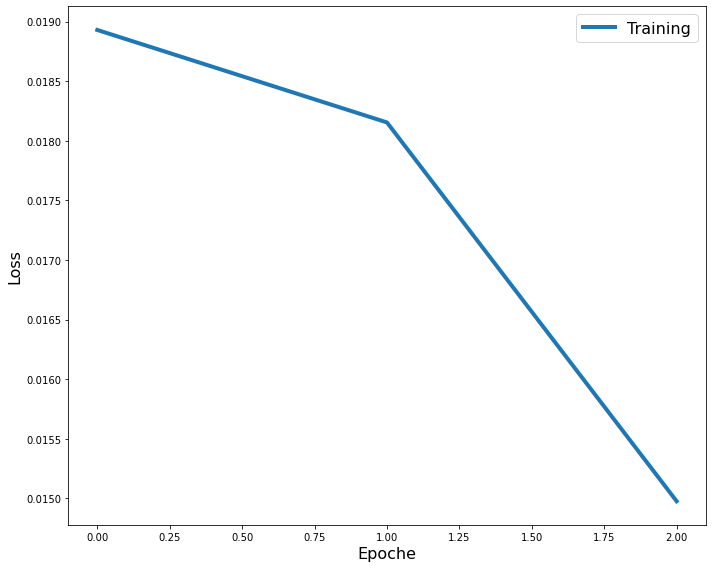

In [155]:
from IPython.display import clear_output

class CustomCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.x = []
        self.loss = []
        self.val_loss = []


    def on_test_batch_begin(self, epoch, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        self.x.append(epoch)
        self.loss.append(logs["loss"])

        clear_output(wait=True)
        tf.print(logs)
        self.val_loss.append(logs["val_loss"])
        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
        ax1.plot(self.x, self.loss, lw=4, label="Training")
        ax1.plot(self.x, self.val_loss, lw=4, label="Validation")
        ax1.legend(fontsize=16)
        ax1.set_xlabel("Epoche", fontsize=16)
        ax1.set_ylabel("Loss", fontsize=16)

        plt.tight_layout()
        plt.show()


custom_callback = CustomCallback()

{'loss': 0.036167822778224945,
 'sparse_categorical_accuracy': 0.9896666407585144,
 'val_loss': 0.13038787245750427,
 'val_sparse_categorical_accuracy': 0.9642000198364258}


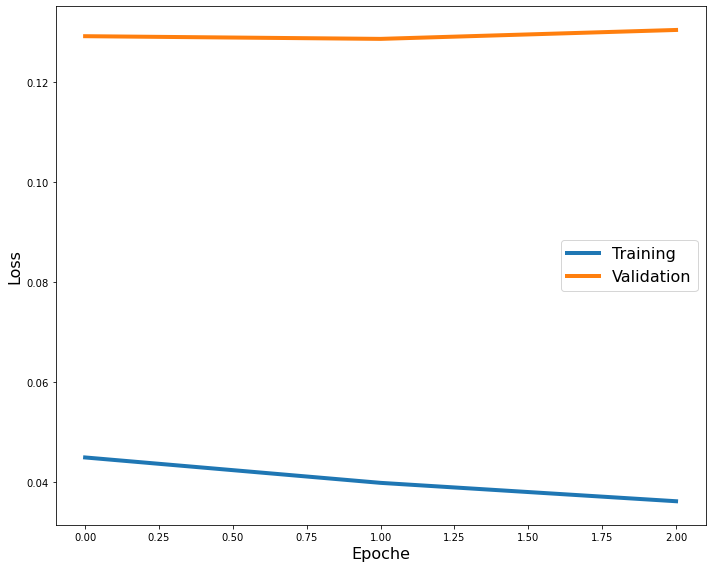

In [156]:
model.fit(x_train, y_train, validation_split=0.1 ,epochs=3, callbacks=[custom_callback], steps_per_epoch=100)

In [143]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [133]:
for i in a.take(1):
    print(i)

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [146]:
a = dataset.map(lambda pic, label: {"digits": pic, "label": label, "thingy": 1})

In [147]:
for i in a.take(1):
    print(a["label"])

TypeError: 'MapDataset' object is not subscriptable

In [148]:
model.fit(a)

/home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:592: UserWarning: Input dict contained keys ['label', 'thingy'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


ValueError: in user code:

    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/julius/miniconda3/envs/octClassifier/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_1 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (784, 1)


In [40]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [3]:
background = Image.open("test_image.png")

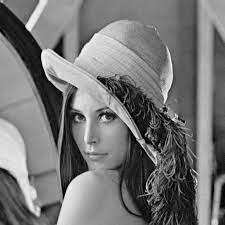

In [6]:
background.convert("RGB")

In [62]:
x_spacing = 23
y_spacing = 28

In [64]:
import numpy as np

im = np.zeros((225,225,3), dtype=np.uint8)
# Draw grid
im[:, y_spacing:-1:y_spacing] = [255,0,0]    # red horizontal lines
im[x_spacing:-1:x_spacing, :] = [255,0,0]    # blue vertical lines
new_ima = Image.fromarray(im).convert("RGB")

In [32]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)

In [39]:
new_img.show()

In [77]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)
ImageDraw.Draw(new_img).text(
    (0 * y_spacing + 2, 0 * x_spacing),  # Coordinates
    '1',
    color # Color
       , font=12

)
new_img.save("saved_test.png")

AttributeError: 'int' object has no attribute 'getmask'

In [78]:
loss_wert = 0.8
if loss_wert > 0.5:
    color = (255,0,0)

font = ImageFont.load_default()

In [79]:
font

In [75]:
font = ImageFont.truetype("/root/pyscripts/arial.ttf", 12)

OSError: cannot open resource